Requirements:
- pandas
- openpyxl
- xlrd
- matplotlib

In [2]:
import pandas as pd

## Data loading
Merge all the monthly RDA reports.

In [13]:
# computer:
import socket
hostname = socket.gethostname()

if hostname == 'arch':
    directory = '/home/sergio/Documents/TELMEX/Productividad/Datos/2020/rda/'
else:
    directory = '/home/sergio/Documents/Telmex/Productividad/Data/2020/rda/'


file_prefix = 'rdat_metro'

df = pd.DataFrame()

import os
rda_files = []
columns = []
for f in os.listdir(directory):
    if f.startswith(file_prefix):
        df_tmp = pd.read_excel(directory + f, sheet_name='base')
        #print(f, '-', df_tmp.shape)
        columns.append(df_tmp.columns)
        df = df.append(df_tmp)
        
#print(df.shape)

Pick just the ones related to CM_AB

In [6]:
df = df[df['CMANTENI'] == 'CMABS']
print('Data frame shape:', df.shape)

Data frame shape: (59, 47)


Split columns by type

In [14]:
#print(ab.dtypes)
date_cols = df.select_dtypes('datetime')
int_cols = df.select_dtypes('number')
obj_cols = df.select_dtypes(object)
#print(date_cols.shape)
#print(int_cols.shape)
#print(obj_cols.shape)

---
# Numeric data
Maybe a describe is good enough.

In [4]:
int_cols.describe()

,DURACTE,DURAREP,DURATLM,FOLIOF,FOLIOQ,COD01,COD02,COD03,COD04,COD05,FOL_SER,t_1a_oin_c
count,6613.000000,6643.000000,6619.000000,6.643000e+03,6.643000e+03,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6.605000e+03,2165.000000
mean,11.906132,7.860974,5.304884,7.826650e+06,7.826650e+06,3.428120,3.190577,25.409002,22.119073,108.091525,2.757802e+06,0.250808
std,140.676966,89.086961,86.873133,1.516093e+05,1.516088e+05,0.999882,1.209015,77.206022,12.265339,1.993378,9.475093e+06,6.411375
min,-3.930000,-3.933333,-92.660000,7.391937e+06,7.391937e+06,1.000000,1.000000,1.000000,4.000000,103.000000,8.275000e+03,-10.000000
25%,1.450000,1.116666,0.360000,7.699852e+06,7.699852e+06,2.000000,3.000000,6.000000,12.000000,109.000000,1.377817e+06,0.000000
50%,2.720000,2.100000,1.420000,7.803686e+06,7.803686e+06,4.000000,3.000000,11.000000,25.000000,109.000000,1.657944e+06,0.000000
75%,8.010000,3.550000,2.730000,7.955580e+06,7.955580e+06,4.000000,3.000000,17.000000,31.000000,109.000000,1.869976e+06,0.000000
max,8756.000000,6965.116666,6965.110000,8.103753e+06,8.103753e+06,4.000000,6.000000,469.000000,68.000000,111.000000,8.250847e+07,223.000000


---
# Date data

In [ ]:
'''
# Some testing
months = date_cols['FECHA_REAL'].dt.month
ab_MONTH = ab.join(months, rsuffix='_MONTH')
ab_MONTH[['FECHA_REAL', 'FECHA_REAL_MONTH']]
'''

----
### Count by days

In [8]:
instances_by_day = df['FECHA_REAL'].dt.floor('d').value_counts()
#xs = instances_by_day.index
#ys = instances_by_day.values

### Count by months

In [15]:
instances_by_month = df['FECHA_REAL'].groupby([df.FECHA_REAL.dt.year, df.FECHA_REAL.dt.month]).agg('count')
instances_by_month = pd.DataFrame(instances_by_month)
instances_by_month['year_month'] = instances_by_month.index.to_series().apply(lambda x: '{0}-{1:02}'.format(*x))
instances_by_month = instances_by_month.set_index('year_month')
instances_by_month = instances_by_month.rename(columns = {'FECHA_REAL': 'instancias'})
#instances_by_month

---
# Plotting

In [10]:
import seaborn as sns

In [16]:
df = pd.DataFrame(instances_by_day)
df = df.sort_index()

Plotting instances by day

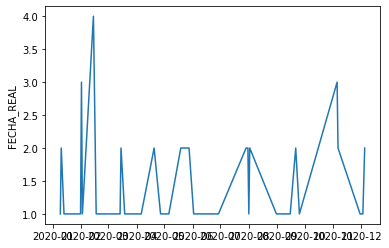

In [18]:
sns.lineplot(x =df.index, y = 'FECHA_REAL', data=df);

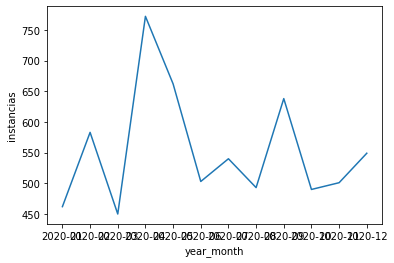

In [17]:
sns.lineplot(x ='year_month', y = 'instancias', data=instances_by_month);

### Making it smoother
This gets complicated, because to make it smoother, a model needs to be found so that it 'emulates' the points with a softer line.